# Level of Education Vs Average salary: Descrptive Statistics

We used a dataset from Bureau of labor statistics to find the correlation between the Level of Education and the Average annual salary. We used two variables from the dataset to study any correlation:

1. Typical Entry level Education
2. Median annual wage

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn import datasets

In [2]:
college_data = pd.read_csv("Employment Projections.csv")

In [3]:
college_data

,Occupation Title,Occupation Code,Employment 2021,Employment 2031,"Employment Change, 2021-2031","Employment Percent Change, 2021-2031","Occupational Openings, 2021-2031 Annual Average",Median Annual Wage 2021,Typical Entry-Level Education,Education Code,Work Experience in a Related Occupation,Workex Code,Typical on-the-job Training,trCode
0,Accountants and auditors * Account Auditor*...,"=""13-2011""","1,449.8","1,531.6",81.8,5.6,136.4,"77,250",Bachelor's degree,3,None,4,None,6
1,Actors * Actor Understudy* Actress* Dramati...,"=""27-2011""",50.6,54.7,4.1,8.2,7.0,NaN,"Some college, no degree",6,None,4,Long-term on-the-job training,3
2,Actuaries * Actuarial Associate* Actuarial ...,"=""15-2011""",28.3,34.2,5.9,20.8,2.4,"105,900",Bachelor's degree,3,None,4,Long-term on-the-job training,3
3,Acupuncturists,"=""29-1291""",23.7,24.6,0.9,3.9,1.7,"60,570",Master's degree,2,None,4,None,6
4,Adhesive bonding machine operators and tenders...,"=""51-9191""",12.7,12.9,0.2,1.5,1.6,"37,630",High school diploma or equivalent,7,None,4,Moderate-term on-the-job training,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,"Woodworkers, all other * Pole Framer* Timbe...","=""51-7099""",11.4,12.3,0.9,7.7,1.4,"35,610",High school diploma or equivalent,7,None,4,Moderate-term on-the-job training,4
828,"Woodworking machine setters, operators, and te...","=""51-7042""",69.4,71.7,2.2,3.2,7.2,"36,090",High school diploma or equivalent,7,None,4,Moderate-term on-the-job training,4
829,Word processors and typists * Clerk Typist*...,"=""43-9022""",46.1,28.5,-17.6,-38.2,3.1,"44,030",High school diploma or equivalent,7,None,4,Short-term on-the-job training,5
830,Writers and authors * Advertising Copy Writ...,"=""27-3043""",142.8,148.7,5.9,4.1,15.2,"69,510",Bachelor's degree,3,None,4,Long-term on-the-job training,3


In [4]:
college_df = college_data.dropna(subset = ["Median Annual Wage 2021"])
college_df.columns

Index(['Occupation Title', 'Occupation Code', 'Employment 2021',
       'Employment 2031', 'Employment Change, 2021-2031',
       'Employment Percent Change, 2021-2031',
       'Occupational Openings, 2021-2031 Annual Average',
       'Median Annual Wage 2021', 'Typical Entry-Level Education',
       'Education Code', 'Work Experience in a Related Occupation',
       'Workex Code', 'Typical on-the-job Training', 'trCode'],
      dtype='object')

In [5]:
college_df["Median Wage 2021"] = college_df["Median Annual Wage 2021"].str.replace(",","")
#in order to change wage to a float, we needed to get rid of commas and then change the values of '>=208000' to '208000'. 
#This affected 18 rows of data
college_df["Median Wage 2021"] = college_df["Median Wage 2021"].str.replace(">=208000","208000")

college_df["Median Wage 2021"] = college_df["Median Wage 2021"].astype(float)
#college_df.head()
college_df_mean = round(college_df.groupby("Typical Entry-Level Education")["Median Wage 2021"].mean(),2)
college_df_mean

C:\Users\bhart\AppData\Local\Temp\ipykernel_10404\3333635120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_df["Median Wage 2021"] = college_df["Median Annual Wage 2021"].str.replace(",","")
C:\Users\bhart\AppData\Local\Temp\ipykernel_10404\3333635120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_df["Median Wage 2021"] = college_df["Median Wage 2021"].str.replace(">=208000","208000")
C:\Users\bhart\AppData\Local\Temp\ipykernel_10404\3333635120.py:6: SettingWithCopyWarning: 
A valu

Typical Entry-Level Education
Associate's degree                    59480.61
Bachelor's degree                     80170.89
Doctoral or professional degree      123650.14
High school diploma or equivalent     46071.43
Master's degree                       82992.56
No formal educational credential      36277.00
Postsecondary nondegree award         53101.20
Some college, no degree               40008.33
Name: Median Wage 2021, dtype: float64

In [15]:
college_df_median = round(college_df.groupby("Typical Entry-Level Education")["Median Wage 2021"].median(),2)
college_df_median

Typical Entry-Level Education
Associate's degree                   60340.0
Bachelor's degree                    77030.0
Doctoral or professional degree      98070.0
High school diploma or equivalent    44810.0
Master's degree                      78780.0
No formal educational credential     32450.0
Postsecondary nondegree award        48315.0
Some college, no degree              39445.0
Name: Median Wage 2021, dtype: float64

In [6]:
degrees = ["No formal educational credential","High school diploma or equivalent","Some college, no degree","Associate's degree", 
          "Bachelor's degree", "Postsecondary nondegree award", "Master's degree","Doctoral or professional degree"
         ]
salary =[]
for degree in degrees:
    wage = college_df.loc[college_df["Typical Entry-Level Education"] == degree, "Median Wage 2021"]
    salary.append(wage)
    quartiles = wage.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    print(f"{quartiles}")
    iqr = upperq - lowerq 

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = wage.loc[(wage < lower_bound) | (wage > upper_bound)]
    print(f"potential outliers:{degree} {outliers}")

0.25    29325.0
0.50    32450.0
0.75    38975.0
Name: Median Wage 2021, dtype: float64
potential outliers:No formal educational credential 45     61580.0
47     77300.0
156    60300.0
457    57900.0
695    56380.0
770    61080.0
810    61260.0
Name: Median Wage 2021, dtype: float64
0.25    37200.0
0.50    44810.0
0.75    49580.0
Name: Median Wage 2021, dtype: float64
potential outliers:High school diploma or equivalent 107     70200.0
204     83640.0
237     78310.0
244     97860.0
282     73060.0
300     72010.0
309     71260.0
310     79680.0
313     99330.0
354     76910.0
357     70720.0
358     77850.0
462     79740.0
546    104260.0
600     79540.0
617     76260.0
630     80250.0
633     98530.0
634     80850.0
727     80570.0
760     81180.0
802     79770.0
805     98230.0
Name: Median Wage 2021, dtype: float64
0.25    36832.5
0.50    39445.0
0.75    44412.5
Name: Median Wage 2021, dtype: float64
potential outliers:Some college, no degree Series([], Name: Median Wage 2021, dtype

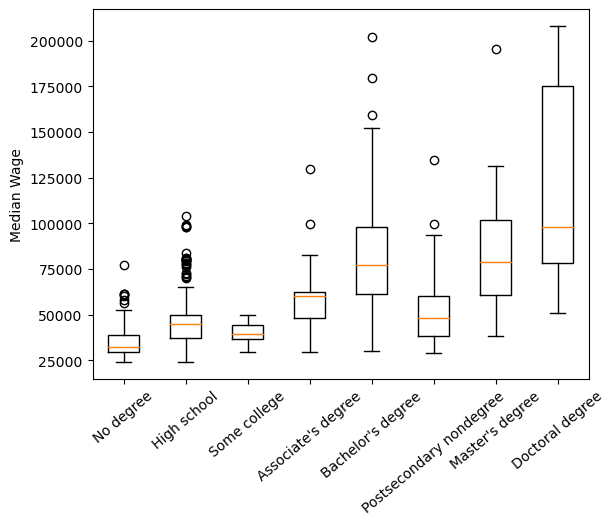

In [8]:
plt.boxplot(salary)
plt.ylabel("Median Wage")
plt.xticks([1,2,3,4,5,6,7,8], ["No degree","High school","Some college","Associate's degree", 
          "Bachelor's degree", "Postsecondary nondegree", "Master's degree","Doctoral degree"
         ],rotation = 40)
plt.show()

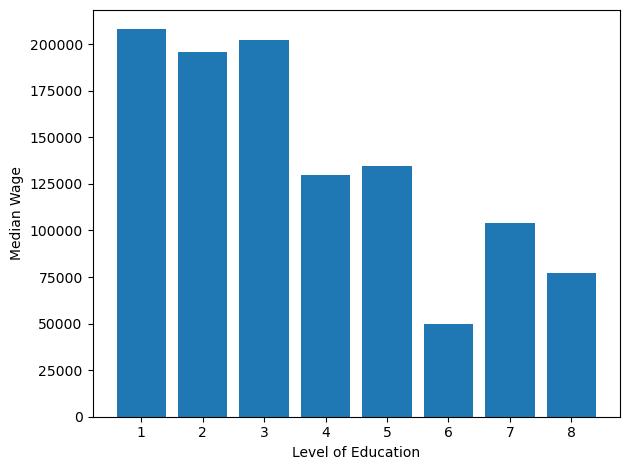

In [9]:
x = college_df['Education Code']
y = college_df['Median Wage 2021']
plt.bar(x,y)
plt.ylabel("Median Wage")
plt.xlabel("Level of Education")
#plt.xticks(rotation = 180)
plt.tight_layout()
plt.show()

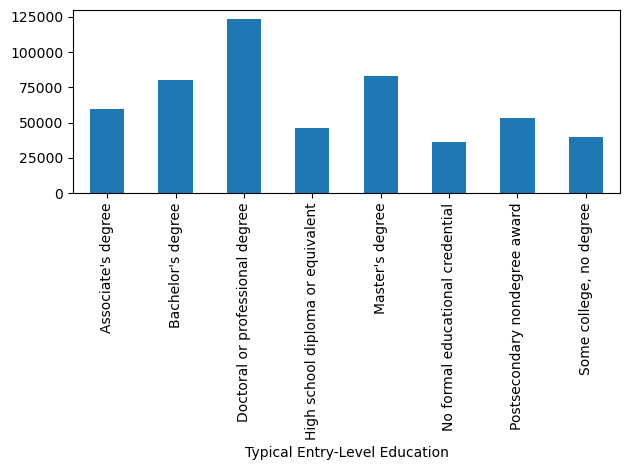

In [10]:
# value_count =  college_df['Typical Entry-Level Education'].value_counts()
# x = value_count.index.values
# y = college_df_mean
college_df_mean.plot(kind = 'bar')
plt.tight_layout()
plt.show()


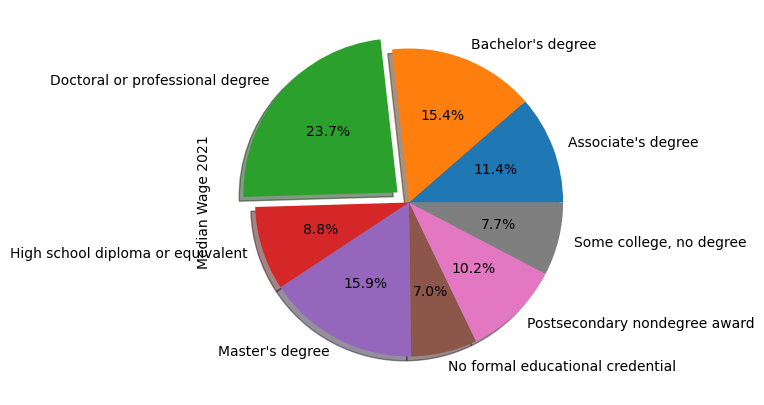

In [14]:
college_df_mean.plot(kind = 'pie',autopct='%1.1f%%', figsize=(5, 5), explode = (0,0,0.1,0,0,0,0,0),shadow = True)
plt.show()

y = -10086.08x + 114310.81
The r-value is: 0.45116446788193254


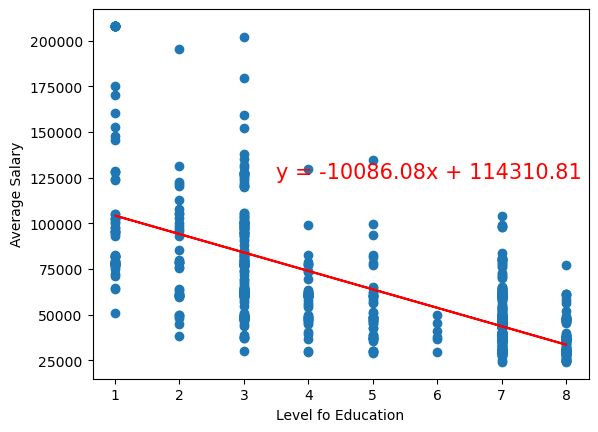

In [12]:
x_values = college_df['Education Code']
y_values = college_df['Median Wage 2021']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Level fo Education")
plt.ylabel("Average Salary")
plt.annotate(line_eq,(3.5,125000),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

# Correlation between the two variables:

The r value shows a strong correlation between the level of Education and the average salary. Higher the degree(or lower the level of Education), higher is the salary.On an average, a person with a doctoral degree earns higher than a someone with just a high school diploma or an associate's degree.

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: >]], dtype=object)

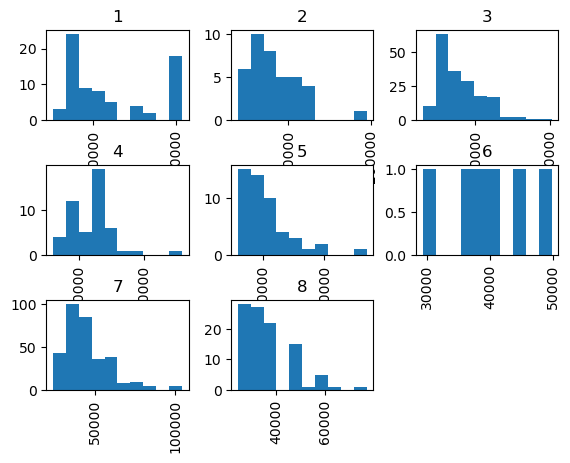

In [19]:
college_df.hist( by = 'Education Code', column = 'Median Wage 2021')